In [2]:
import numpy as np
import pickle as pkl
import sys
import cv2

from structs import FrameInst
from surveillant import *

with open('./output/struct_storage/0509_1_A3_ELEVATOR_slice.pkl', 'rb') as f:
    data = pkl.load(f)

# print(data)

embs = [x.embedding for x in data['frames']]
# print(embs)
surve = Surveillant(detector_ckpt='cv_models/VGG_VOC0712_SSD_512x512_ft_iter_120000.ckpt',
                    reid_ckpt='cv_models/checkpoint-25000')


INFO:tensorflow:Restoring parameters from /Users/knwng/Downloads/code/workspace/indoor-trajectory-surveillant/cv_models/VGG_VOC0712_SSD_512x512_ft_iter_120000.ckpt
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Restoring parameters from /Users/knwng/Downloads/code/workspace/indoor-trajectory-surveillant/cv_models/checkpoint-25000


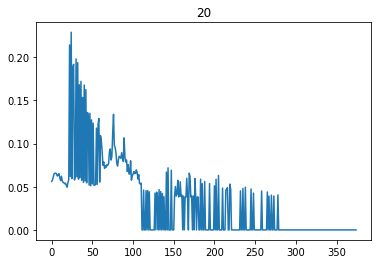

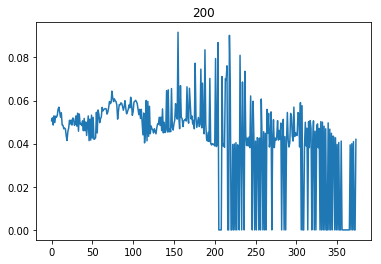

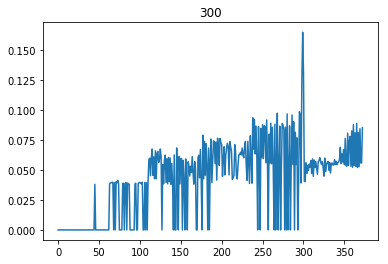

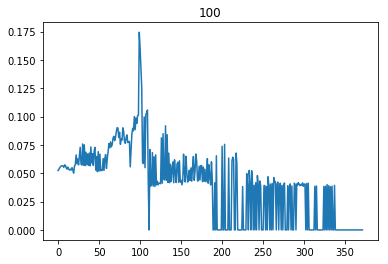

In [13]:
import random
import matplotlib
import matplotlib.pyplot as plt

query = embs.pop(20)

def thresh(scores):
    return list(map(lambda x:x if x > 0.038 else 0, scores))

scores = []
for _emb in embs:
    scores.append(surve.reid.score(query, _emb))

scores = thresh(scores)
plt.figure()
plt.plot(range(len(scores)), scores)
plt.title('20')
plt.show()

query2 = embs.pop(200)
scores2 = []
for _emb in embs:
    scores2.append(surve.reid.score(query2, _emb))
    
scores2 = thresh(scores2)
plt.figure()
plt.plot(range(len(scores2)), scores2)
plt.title('200')
plt.show()

query3 = embs.pop(300)
scores3 = []
for _emb in embs:
    scores3.append(surve.reid.score(query3, _emb))
    
scores3 = thresh(scores3)
plt.figure()
plt.plot(range(len(scores3)), scores3)
plt.title('300')
plt.show()

query4 = embs.pop(100)
scores4 = []
for _emb in embs:
    scores4.append(surve.reid.score(query4, _emb))
    
scores4 = thresh(scores4)
plt.figure()
plt.plot(range(len(scores4)), scores4)
plt.title('100')
plt.show()